<a href="https://colab.research.google.com/github/karlopehar1/racunalni-vid/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

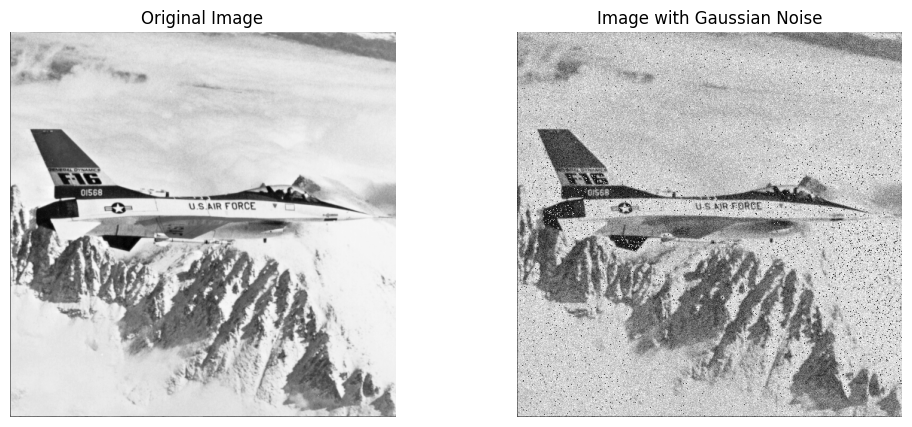

In [12]:
### 1. zadatak
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def gaussian_noise(img, mu, sigma):
    noise = np.random.normal(mu, sigma, img.shape)
    return noise.astype(np.uint8)

img = cv.imread('airplane.bmp', cv.IMREAD_GRAYSCALE)

mu = 0
sigma = 20
noise = gaussian_noise(img, mu, sigma)
img_noisy = img + noise

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')

plt.show()


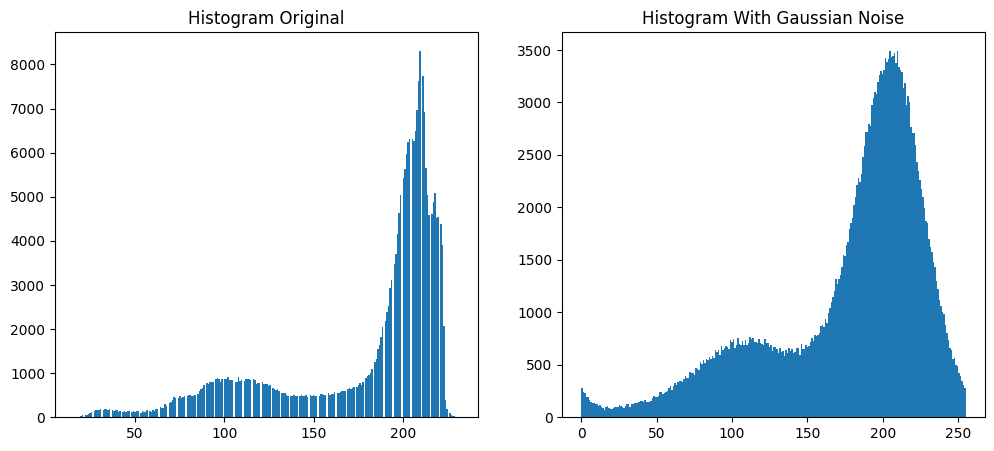

In [9]:
### 2. zadatak
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(img.flatten(), bins=256)
plt.title("Histogram Original")

plt.subplot(1, 2, 2)
plt.hist(img_noisy.flatten(), bins=256)
plt.title("Histogram With Gaussian Noise")

plt.show()


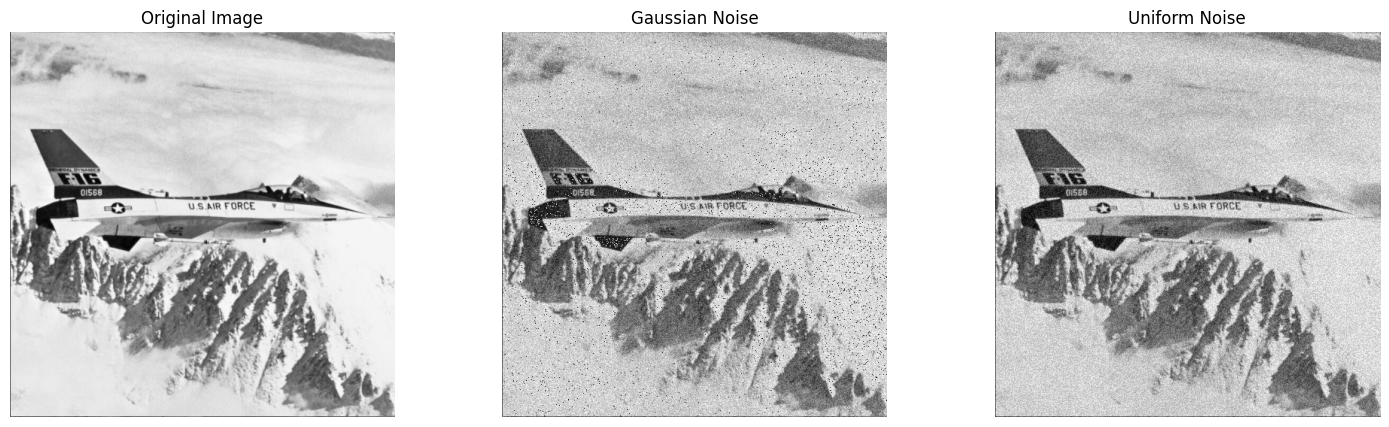

In [10]:
### 3. zadatak
def uniform_noise(img, a=-30, b=30):
    noise = np.random.uniform(a, b, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img.astype(np.uint8)

img_uniform = uniform_noise(img, -30, 30)

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_noisy, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_uniform, cmap='gray')
plt.title("Uniform Noise")
plt.axis('off')
plt.show()


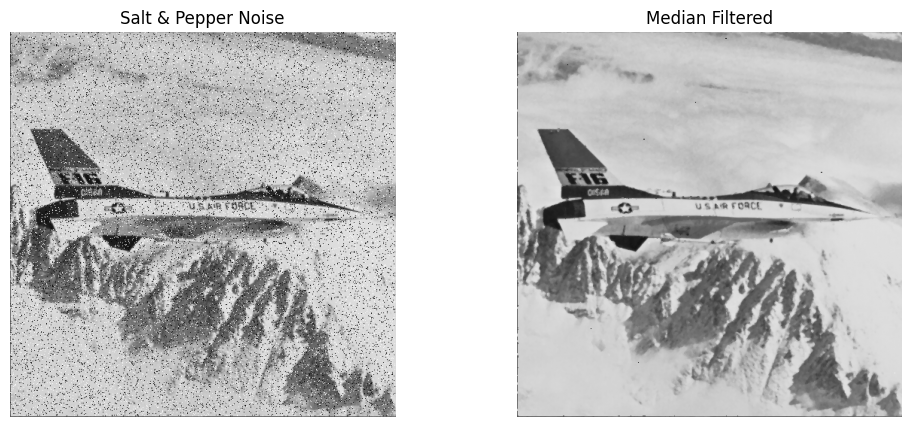

In [11]:
### 4. zadatak
def salt_n_pepper_noise(img, percent=10):
    noisy_img = img.copy()
    total_pixels = img.size
    num_salt = int(total_pixels * percent / 200)
    num_pepper = int(total_pixels * percent / 200)

    # Salt (bijeli)
    coords = [np.random.randint(0, i-1, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255
    # Pepper (crni)
    coords = [np.random.randint(0, i-1, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0
    return noisy_img

img_snp = salt_n_pepper_noise(img, percent=10)
img_median = cv.medianBlur(img_snp, 3)  # radius = 3, možeš mijenjati

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_snp, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_median, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')
plt.show()


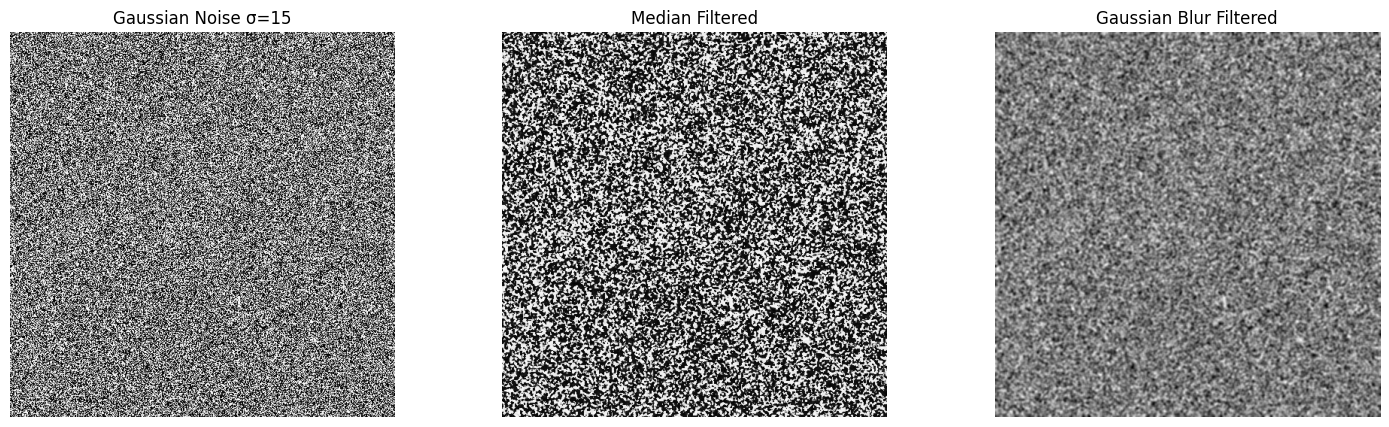

In [13]:
### 5. zadatak
sigma_task5 = 15
img_gauss_task5 = gaussian_noise(img, 0, sigma_task5)

img_median_task5 = cv.medianBlur(img_gauss_task5, 3)  # radius = 3
img_gaussblur_task5 = cv.GaussianBlur(img_gauss_task5, (5,5), 1.5)  # kernel 5x5, sigma=1.5

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(img_gauss_task5, cmap='gray')
plt.title("Gaussian Noise σ=15")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_median_task5, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_gaussblur_task5, cmap='gray')
plt.title("Gaussian Blur Filtered")
plt.axis('off')
plt.show()